Skriv et program som, gitt et datasett og et intervall for stigningstall, bestemmer funksjonsuttrykket til den linjen som passer datasettet best. Balansepunktet  skal ligge på linja. Programmet skal vise to grafer - én for punktene sammen med linjen funnet, og én som viser summen S for verider i intervallet gitt.


#### Test Datasett

<table>
    <tr>
        <td>X</td>
        <td>1</td>
        <td>13</td>
        <td>11</td>
        <td>4</td>
        <td>5</td>
        <td>8</td>
    </tr>
    <tr>
        <td>Y</td>
        <td>1</td>
        <td>4</td>
        <td>9</td>
        <td>3</td>
        <td>6</td>
        <td>9</td>
    </tr>
</table>

In [56]:
DATASET = [(1,1), (13,4), (11, 9), (4, 3), (5, 6), (8, 9)]
GROWTH_INTERVAL = [-2, 2]
# DATASETT.sort()
a = GROWTH_INTERVAL[0]


### Finn balansepunkt

In [57]:
xsum = 0
ysum = 0
for point in DATASET:
    xsum += point[0]
    ysum += point[1]

average_x = xsum / len(DATASET)
average_y = ysum / len(DATASET)
balance_point = (average_x, average_y)

### Definer funksjonen
Bruker ettpunktsformelen sammen med balansepunktet og stigningstallet til å tegne en rett linje.

$y - y_1 = a(x -x_1)$

$y = a(x -x_1) + y_1$

Hvor punktet har verdiene $(x_1, y_1)$
I dette tilfellet ville det vært **balancepoint**

In [58]:
def f(x):
    return a * (x - balance_point[0]) + balance_point[1]

### Minstekvadratersmetode

In [59]:
current_best = (1000000, 0)
sum = 0

sx_list = []
sy_list = []

while a < GROWTH_INTERVAL[1]:
    sum = 0

    for point in DATASET:
        sum += (point[1] - f(point[0]))**2
    
    if sum < current_best[0]:
        current_best = (sum, a)

    a += 0.001
    sx_list.append(a)
    sy_list.append(sum)

# print(current_best)
a = current_best[1]

### Plot Minstekvadraters Graf

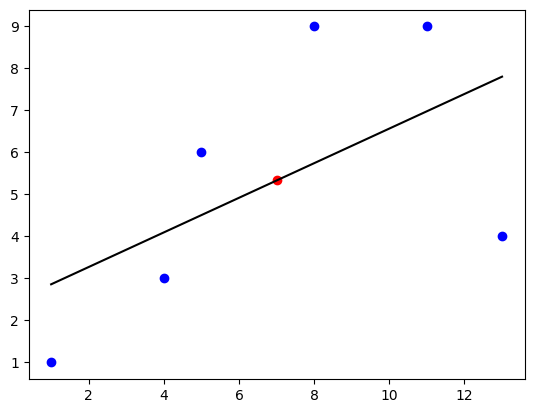

In [60]:
import matplotlib.pyplot as plt

pointsx = [point[0] for point in DATASET]
pointsy = [point[1] for point in DATASET]

x_list = []
y_list = []
x = min(DATASET)[0]

while x < max(DATASET)[0]:
    x_list.append(x)
    y_list.append(f(x))

    x += 0.001

plt.plot(pointsx, pointsy, "bo")
plt.plot(balance_point[0], balance_point[1], "ro")
plt.plot(x_list, y_list, "k-")
plt.show()

### Plot Sum Graf

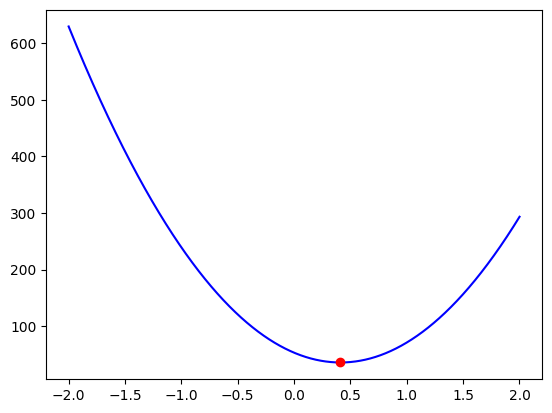

In [61]:
plt.plot(sx_list, sy_list, "b-")
plt.plot(a, sy_list[sx_list.index(a)], "ro")
plt.show()